In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

### Load Dataset

In [2]:
data = datasets.load_digits()

In [3]:
X_data = data.images   # load X_data
y_data = data.target   # load y_data

In [4]:
X_data.shape

(1797, 8, 8)

In [5]:
y_data.shape

(1797,)

In [6]:
print('the total number of classes is {}'.format(len(np.unique(y_data))))

the total number of classes is 10


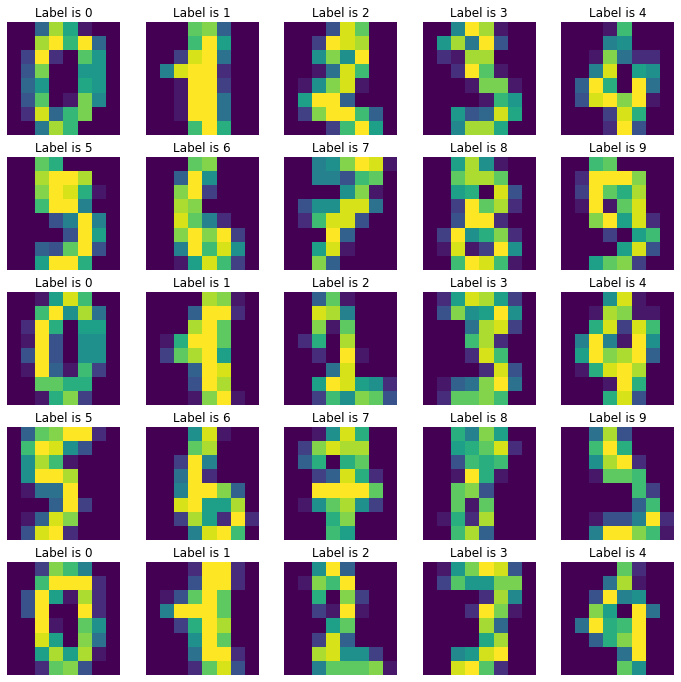

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 12))

for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.set_title('Label is {}'.format(y_data[i]))
    plt.imshow(X_data[i])
    plt.axis('off')
    
    #plt.xticks([])
    #plt.yticks([])
    
    #plt.show()
    #print('Label is {}'.format(y_data[i]))

In [8]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1] * X_data.shape[2])    # flatten X_data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)    # split data into train & test set

### 1. Single Classifier
- A single SVM classifier

In [20]:
clf = SVC(probability=True)

In [21]:
clf.fit(X_train, y_train)

SVC(probability=True)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print(accuracy_score(y_pred, y_test))

0.9888888888888889


In [34]:
X_test[0][np.newaxis,:].shape

(1, 64)

In [35]:
clf.predict_proba(X_test[0][np.newaxis,:])

array([[9.76112781e-04, 9.26222398e-04, 4.87403563e-04, 4.26480432e-04,
        1.58205678e-03, 7.64588113e-04, 9.91450228e-01, 3.32722541e-04,
        2.82842530e-03, 2.25760080e-04]])

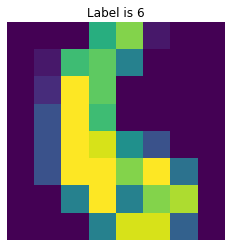

In [47]:
fig = plt.figure(figsize=(4, 4))

plt.title('Label is {}'.format(y_test[0]))
plt.imshow(X_test[0].reshape([8,8]))
plt.axis('off');

### 2. Bagging (Bootstrap Aggregation)
- Aggregate predictions from many estimators with random bootstrap samples
- Train 100 independent SVM classifiers and aggregate them
- Parameter description
    - **base_estimator**: classification algorithm to predict & aggregate its results
    - **n_estimators**: number of bootstrap samples & classifiers created by them
    - **max_samples**: proportion of samples to be drawn from training data to train
    - **max_features**: proportion of features to be used for training

In [48]:
bag_clf = BaggingClassifier(base_estimator = SVC(), n_estimators = 100, max_samples = 0.5, max_features = 1.0, random_state = 5)    # create a bagging classifier

In [49]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), max_samples=0.5, n_estimators=100,
                  random_state=5)

In [50]:
y_pred = bag_clf.predict(X_test)

In [51]:
print(accuracy_score(y_pred, y_test))

0.9833333333333333


### 3. Voting Classifier
- Combine different classifiers and "vote" using their results 
- Voting methods
    - **Soft voting**: for each data instance, class label with greated summed predicted probabilities is selected as final class
    - **Hard voting**: for each data instance, majority of class labels predicted are selected as final class
- Not only same classification algorithms, but also different algorithms can be combined as well

#### Hard voting with same classifiers (SVC)

In [13]:
clf_1 = SVC()
clf_2 = SVC()
clf_3 = SVC()

In [14]:
hard_vote_clf = VotingClassifier(estimators = [('svm1', clf_1), ('svm2', clf_2), ('svm3', clf_3)], voting = 'hard')

In [15]:
hard_vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm1', SVC()), ('svm2', SVC()), ('svm3', SVC())])

In [16]:
y_pred = hard_vote_clf.predict(X_test)

In [17]:
print(accuracy_score(y_pred, y_test))

0.9888888888888889


#### Soft voting with different classifiers (SVC, DT, NB)

In [18]:
clf_1 = SVC(probability=True)    # probability has to be set 'True' in order to perform soft voting
clf_2 = DecisionTreeClassifier()
clf_3 = GaussianNB()

In [19]:
soft_vote_clf = VotingClassifier(estimators = [('svm', clf_1), ('decision_tree', clf_2), ('naive_bayes', clf_3)], voting = 'soft')

In [20]:
soft_vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('decision_tree', DecisionTreeClassifier()),
                             ('naive_bayes', GaussianNB())],
                 voting='soft')

In [21]:
y_pred = soft_vote_clf.predict(X_test)

In [22]:
print(accuracy_score(y_pred, y_test))

0.9388888888888889
